## How to use

Use this URL to access:

**shorturl.at/kmyAR**

To use this notebook first you need to create a copy in your own personnal google drive (as per the first picture of the first practical session). **Then you'll need to switch the runtime to GPU to be able to train your models on GPU to reduce runtime** (as per the second picture of the first practical session).

# Deep learning : **_Neural Network Applications_**

## Computer vision

### Object detection and image segmentation

#### Installation

In [ ]:
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 19.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=4785328974ab93c9b072de1b9db9670971ee74c65e6c3edb52f43e21f499beb4
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-7su2h0u2
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-7su2h0u2
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 79 kB

#### Demonstration

Among the main topics in computer vision are object detection and image segmentation.

In the first task, the goal is to draw a box around each object on an image, the notion of objects depending on what we defined when training the neural network.

In the second task, we aim at classifying pixels in a category if the pixel is part of an "object" as a human would see it.

Let us see an example of these tasks, using [Detectron](https://github.com/facebookresearch/detectron2), an open-source model for detection and segmentation.

In [ ]:
# Download some images
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/9/9c/Vue_de_la_prochaine_Ecole_Centrale_Casablanca.jpg -O input_casablanca.jpg

--2022-06-17 15:01:39--  https://upload.wikimedia.org/wikipedia/commons/9/9c/Vue_de_la_prochaine_Ecole_Centrale_Casablanca.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74861 (73K) [image/jpeg]
Saving to: ‘input_casablanca.jpg’

input_casablanca.jp 100%[===================>]  73.11K  --.-KB/s    in 0.002s  

2022-06-17 15:01:39 (31.4 MB/s) - ‘input_casablanca.jpg’ saved [74861/74861]



In [ ]:
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

def build_cfg(file="COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"):
  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file(file))
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(file)
  return cfg

def visualize_outputs(outputs, img, cfg):
  v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  print("\n\nDetections and segmentations:")
  cv2_imshow(out.get_image()[:, :, ::-1])

cfg = build_cfg()
predictor = DefaultPredictor(cfg)

def infer_image(img_path):
  img = cv2.imread(img_path)
  print("Original image:")
  cv2_imshow(img)
  outputs = predictor(img)
  visualize_outputs(outputs, img, cfg)

In [ ]:
infer_image("./input.jpg")

In [ ]:
infer_image("./input_casablanca.jpg")

#### Explanation

A popular architecture for detection and segmentation (also known as instance segmentation): [Mask R-CNN](https://arxiv.org/abs/1703.06870v3)

![Mask R-CNN architecture](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-23_at_7.44.34_PM.png)

_Image taken from [here](https://arxiv.org/pdf/1703.06870.pdf)._

### Generative Adversarial Networks

#### Installation

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt

#### Demonstration

In [ ]:
# Download some pretrained model
# You can pick one among:
#   apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite,
#   horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe,
#   style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo,
#   facades_photo2label, facades_label2photo, iphone2dslr_flower
!bash ./scripts/download_cyclegan_model.sh style_monet

In [ ]:
# Build a small dataset of images to transform
!mkdir -p datasets/custom/testA
%cd datasets/custom/testA

!wget https://upload.wikimedia.org/wikipedia/commons/9/9c/Vue_de_la_prochaine_Ecole_Centrale_Casablanca.jpg -O input_casablanca.jpg

%cd ../../..

In [ ]:
# Transform images
!python test.py --dataroot datasets/custom/testA --name style_monet_pretrained --model test --no_dropout

In [ ]:
import matplotlib.pyplot as plt

def name(img_name, type):
  split_name = img_name.split(".")
  return ".".join(split_name[:-1]) + f"_{type}.{split_name[-1]}"

def show_result(model_type, img_name):
  plt.figure(figsize=(15, 15))
  plt.subplot(121)
  img = plt.imread(f'./results/{model_type}_pretrained/test_latest/images/{name(img_name, "real")}')
  plt.imshow(img)
  plt.title("Real image")
  plt.subplot(122)
  img = plt.imread(f'./results/{model_type}_pretrained/test_latest/images/{name(img_name, "fake")}')
  plt.imshow(img)
  plt.title("Fake image")

show_result("style_monet", "input_casablanca.png")

#### Explanation

Idea of Generative Adversarial Networks:

![GAN](https://miro.medium.com/max/800/0*_PEWcPKaXEBla9pP.png)

_Image taken from [here](https://medium.com/analytics-vidhya/a-review-of-generative-adversarial-networks-part-1-a3e5757a3dc2)._

Other example of generation of images, this time from text: [**Dall-E (mini)**](https://huggingface.co/spaces/dalle-mini/dalle-mini)

### Cleaning:

To avoid conflicts within the different git repositories we are downloading, we are going to clean the servers installation. Normally we would install each repo in a different virtual environment but on collab it is easier to just clean everything.

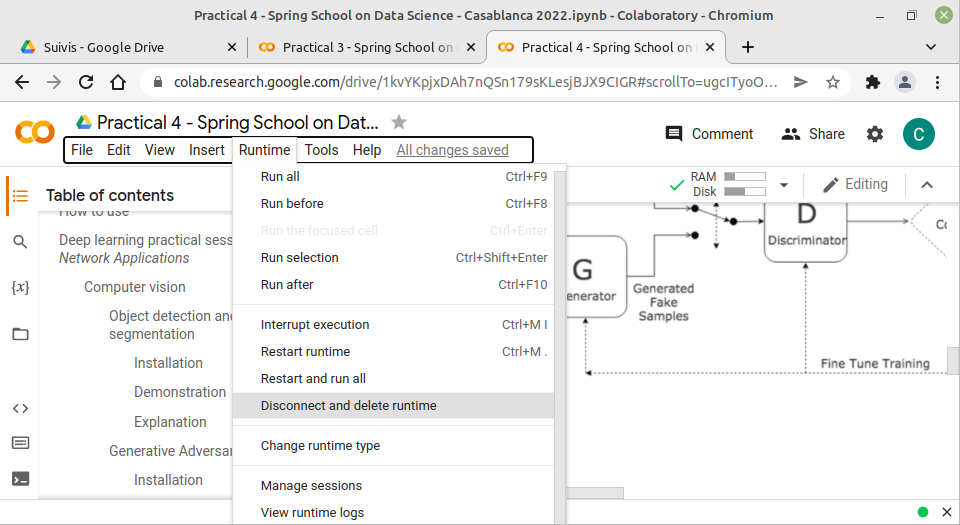

## Natural Language Processing

### Information retrieval from database

In [ ]:
!pip install farm-haystack
!pip install --upgrade pip
!pip install git+https://github.com/deepset-ai/haystack.git#egg=farm-haystack[colab]

In [ ]:
from haystack.utils import clean_wiki_text, convert_files_to_docs, fetch_archive_from_http, print_answers
from haystack.nodes import FARMReader, TransformersReader

! wget https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.9.2-linux-x86_64.tar.gz -q
! tar -xzf elasticsearch-7.9.2-linux-x86_64.tar.gz
! chown -R daemon:daemon elasticsearch-7.9.2

import os
from subprocess import Popen, PIPE, STDOUT

es_server = Popen(
    ["elasticsearch-7.9.2/bin/elasticsearch"], stdout=PIPE, stderr=STDOUT, preexec_fn=lambda: os.setuid(1)  # as daemon
)
# wait until ES has started
! sleep 30

from haystack.document_stores import ElasticsearchDocumentStore

document_store = ElasticsearchDocumentStore(host="localhost", username="", password="", index="document")

# Let's first fetch some documents that we want to query
# Here: 517 Wikipedia articles for Game of Thrones
doc_dir = "data/tutorial1"
s3_url = "https://s3.eu-central-1.amazonaws.com/deepset.ai-farm-qa/datasets/documents/wiki_gameofthrones_txt1.zip"
fetch_archive_from_http(url=s3_url, output_dir=doc_dir)

# Convert files to dicts
# You can optionally supply a cleaning function that is applied to each doc (e.g. to remove footers)
# It must take a str as input, and return a str.
docs = convert_files_to_docs(dir_path=doc_dir, clean_func=clean_wiki_text, split_paragraphs=True)

# We now have a list of dictionaries that we can write to our document store.
# If your texts come from a different source (e.g. a DB), you can of course skip convert_files_to_dicts() and create the dictionaries yourself.
# The default format here is:
# {
#    'content': "<DOCUMENT_TEXT_HERE>",
#    'meta': {'name': "<DOCUMENT_NAME_HERE>", ...}
# }
# (Optionally: you can also add more key-value-pairs here, that will be indexed as fields in Elasticsearch and
# can be accessed later for filtering or shown in the responses of the Pipeline)

# Let's have a look at the first 3 entries:
print(docs[:3])

# Now, let's write the dicts containing documents to our DB.
document_store.write_documents(docs)

from haystack.nodes import BM25Retriever

retriever = BM25Retriever(document_store=document_store)

# Load a  local model or any of the QA models on
# Hugging Face's model hub (https://huggingface.co/models)

reader = FARMReader(model_name_or_path="deepset/roberta-base-squad2", use_gpu=True)

from haystack.pipelines import ExtractiveQAPipeline

pipe = ExtractiveQAPipeline(reader, retriever)



In [ ]:
prediction = pipe.run(
    query="Who is the father of Arya Stark?", params={"Retriever": {"top_k": 10}, "Reader": {"top_k": 5}}
)

print_answers(prediction, details="medium")

### Question answering from context

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Where is the Centrale school ?',
    'context': 'This week we were in Casablanca to participate in the Spring School on datascience and deep learning organised by Centrale and univesity Cadi Ayyad of Marrakech.'
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
print(res)

### Explanation

A popular architecture for processing sequences of data: the Recurrent Neural Networks:

![RNN](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

_Image taken from [here](https://pydeeplearning.weebly.com/blog/basic-architecture-of-rnn-and-lstm)._

### Cleaning:

To avoid conflicts within the different git repositories we are downloading, we are going to clean the servers installation. Normally we would install each repo in a different virtual environment but on collab it is easier to just clean everything.

## Speech processing

### Installation

In [ ]:
!pip install huggingface-hub g2p-en
!git clone https://github.com/pytorch/fairseq
%cd fairseq
!pip install --editable ./

### Demonstration

In [ ]:
from fairseq.checkpoint_utils import load_model_ensemble_and_task_from_hf_hub
from fairseq.models.text_to_speech.hub_interface import TTSHubInterface
from IPython.display import Audio


models, cfg, task = load_model_ensemble_and_task_from_hf_hub(
    "facebook/fastspeech2-en-ljspeech",
    arg_overrides={"vocoder": "hifigan", "fp16": False}
)
model = models[0].cuda()
TTSHubInterface.update_cfg_with_data_cfg(cfg, task.data_cfg)
generator = task.build_generator([model], cfg)

def predictWavFromText(text):
  sample = TTSHubInterface.get_model_input(task, text)
  sample['net_input']['src_tokens'] = sample['net_input']['src_tokens'].cuda()
  wav, rate = TTSHubInterface.get_prediction(task, model, generator, sample)

  wav = wav.cpu()
  return wav, rate

In [ ]:
text = "Welcome to the Casablanca Spring School on Data Science 2022! We hope you enjoyed these practical sessions on deep learning."

wav, rate = predictWavFromText(text)
Audio(wav, rate=rate)

### Cleaning:

To avoid conflicts within the different git repositories we are downloading, we are going to clean the servers installation. Normally we would install each repo in a different virtual environment but on collab it is easier to just clean everything.

## Graphs

### Installation

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

### Demonstration

This demonstration is adapted from [this article](https://towardsdatascience.com/classifying-the-proteins-benchmark-dataset-ec18e728a17a).

In [ ]:
import torch
from torch.nn import Linear, ReLU, Dropout
from torch_geometric.nn import Sequential, GCNConv, global_mean_pool
from torch_geometric.data import DataLoader
from torch_geometric.datasets import TUDataset
import matplotlib.pyplot as plt


# Define our GCN class as a pytorch Module
class GlobalMeanPooling(torch.nn.Module):
    def forward(self, x, batch):
      return global_mean_pool(x, batch)  # [batch_size, hidden_channels]

def GCN(hidden_channels):
    return Sequential('x, edge_index, batch', [
        (GCNConv(dataset.num_node_features, hidden_channels), 'x, edge_index -> x'),
        ReLU(inplace=True),
        (GCNConv(hidden_channels, hidden_channels), 'x, edge_index -> x'),
        ReLU(inplace=True),
        (GCNConv(hidden_channels, hidden_channels), 'x, edge_index -> x'),
        ReLU(inplace=True),
        (GCNConv(hidden_channels, hidden_channels), 'x, edge_index -> x'),
        ReLU(inplace=True),
        (GCNConv(hidden_channels, hidden_channels), 'x, edge_index -> x'),
        (GlobalMeanPooling(), 'x, batch -> x'),
        (Dropout(p=0.5), 'x -> x'),
        (Linear(hidden_channels, dataset.num_classes), 'x -> x')
    ])


dataset = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')
train_dataset = dataset[150:]
test_dataset = dataset[:150]

print("Stats about our dataset:")
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of edges: {dataset[1].num_edges}')
print(f'Average number of edges per graph: {int(sum([data.num_edges for data in dataset]) / len(dataset))}\n')

train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

model = GCN(hidden_channels=16).cuda()
print("Model", model)

In [ ]:
# Set our optimizer (adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Define our loss function
criterion = torch.nn.CrossEntropyLoss()

# Initialize our train function
def train():
    model.train()

    for data in train_loader:
      optimizer.zero_grad()
      data = data.cuda()
      out = model(data.x, data.edge_index, data.batch)
      loss = criterion(out, data.y)
      loss.backward()
      optimizer.step()

# Define our test function
def test(loader):
  model.eval()

  correct = 0
  with torch.no_grad():
    for data in loader:
        data = data.cuda()
        out = model(data.x, data.edge_index, data.batch)
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())
  return correct / len(loader.dataset)


def plot_metrics(metrics):
  plt.plot(metrics["epochs"], metrics["train_acc"], color="orange", label="train")
  plt.plot(metrics["epochs"], metrics["test_acc"], color="blue", label="test")
  plt.title("Training of the graph neural network")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

# Run for 200 epochs (range is exclusive in the upper bound)
metrics = {'epochs': [], 'train_acc': [], 'test_acc': []}
for epoch in range(300):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    if epoch % 10 == 0:
      metrics['epochs'].append(epoch)
      metrics['train_acc'].append(train_acc)
      metrics['test_acc'].append(test_acc)
      print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

plot_metrics(metrics)

### Explanation

![Graph Neural Network](https://tkipf.github.io/graph-convolutional-networks/images/gcn_web.png)

_Image taken from [here](https://tkipf.github.io/graph-convolutional-networks/)_

## Conclusion

You may find numerous other tasks from many fields as well as state-of-the-art models on [Papers With Code](https://paperswithcode.com). This can be a powerful way to find out the best model to use for a specific problem and get the associated code, but also to keep up with the advances in these fields.

As we saw through these sessions, deep learning is excellent on many tasks and performs much better than any other methods on a large range of problems. Still, it is important to keep in mind that **neural networks are not the solution to every problem** and can even perform worse than much simpler methods.
- **Simple models can perform better**: Neural networks are still quite bad on tabular data. When dealing with such data, using linear regressions or quite more complex models like random forests and boosting often lead to better results with little computation.
- **Cost of neural networks**: Neural networks are very fast at inference thanks to the use of GPUs, but this hardware is very expensive and energy demanding. In some problems, very simple models can give results that are similar or even better while requiring much less computation. For instance, when doing optimization with a mathematical model is possible, you may get excellent accuracies with fast computation. Do not put aside all your mathematical knowledge !
- **Reliability**: Neural networks are excellent at many tasks but they are black boxes: we feed in data and get a result, with no explanation of how the result is computed. Keep this in mind when designing models for particular applications, as you may not always rely on models' outputs.

We hope you enjoyed these sessions and wish you the best of luck with your new knowledge !

## References

- [Github repository for object detection and image segmentation](https://github.com/facebookresearch/detectron2)
- [Github repository for GANs in this session](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)
- [Generation of images from text with Dall-E mini](https://huggingface.co/spaces/dalle-mini/dalle-mini)
- [Code for question-answering on Game of Thrones from Wikipedia](https://haystack.deepset.ai/tutorials/first-qa-system)
- [Code for question-answering from context sentence](https://huggingface.co/deepset/roberta-base-squad2)
- [Code for text-to-speech generation](https://huggingface.co/facebook/fastspeech2-en-ljspeech)
- [Library for graph neural networks: _Pytorch Geometric_](https://pytorch-geometric.readthedocs.io/en/latest/index.html)
- [Explanation of graph neural networks]()
- [Many ready-to-use models in NLP, speech processing, vision...](https://huggingface.co/models)

_Practical session written by Thomas Chabal and Clément Riu • Spring School on Data Science - Ecole Centrale Casablanca • 2022._